In [143]:
import pandas as pd
import fbprophet as prophet

In [144]:
df=pd.read_csv("/content/drive/My Drive/Data/Time Series data/data.csv")

In [145]:
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


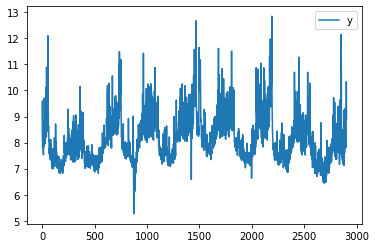

In [146]:
df.plot()

<h2> Making y values stationary</h2>

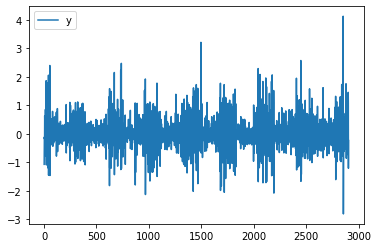

In [147]:
df1=df.copy()
df1['y']=df1['y']-df1['y'].shift(1)
df1.plot()

<h2> Time Series analysis With Prophet Model</h2>

In [148]:
clf=prophet.Prophet()

In [149]:
clf.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<h3> Preparing dates for future prediction</h3>

In [150]:
future_dates=clf.make_future_dataframe(periods=365)

<h3> Predict the future</h3>

In [151]:
predictions=clf.predict(future_dates)

In [152]:
predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.200924,7.489849,8.888258
3266,2017-01-16,8.525932,7.847467,9.291303
3267,2017-01-17,8.313330,7.592270,9.035012
3268,2017-01-18,8.145923,7.413973,8.899564
3269,2017-01-19,8.157831,7.473921,8.927995


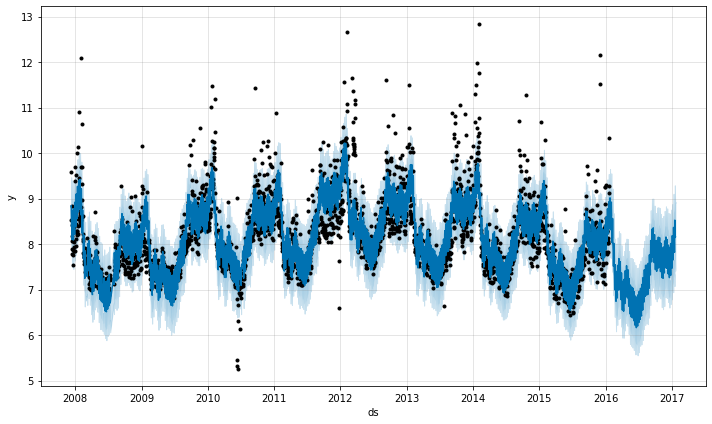

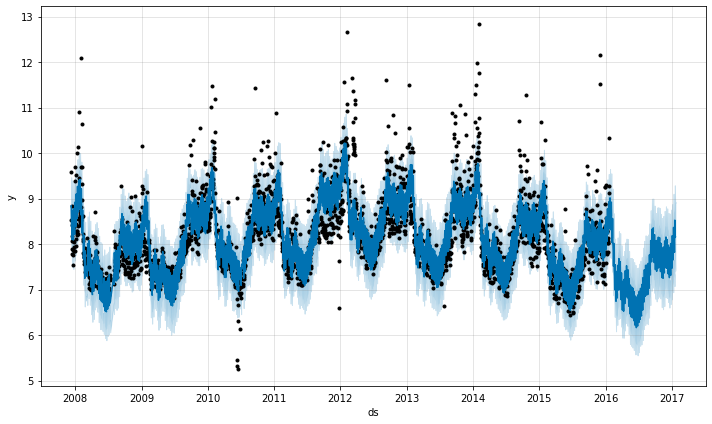

In [153]:
clf.plot(predictions)

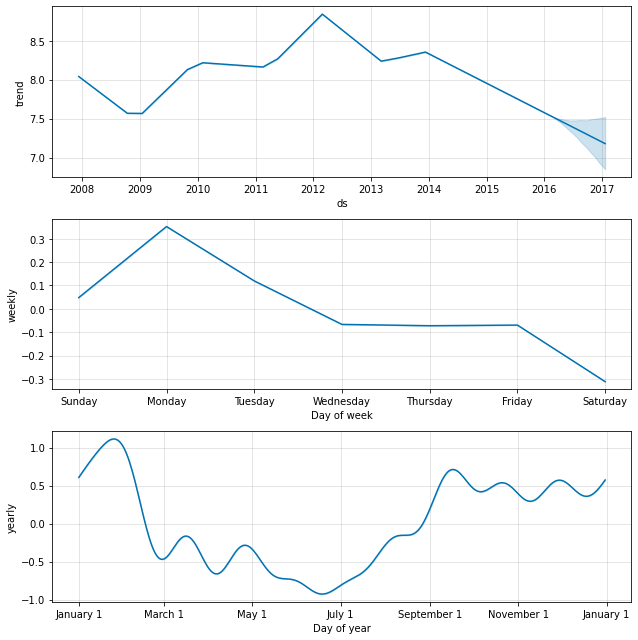

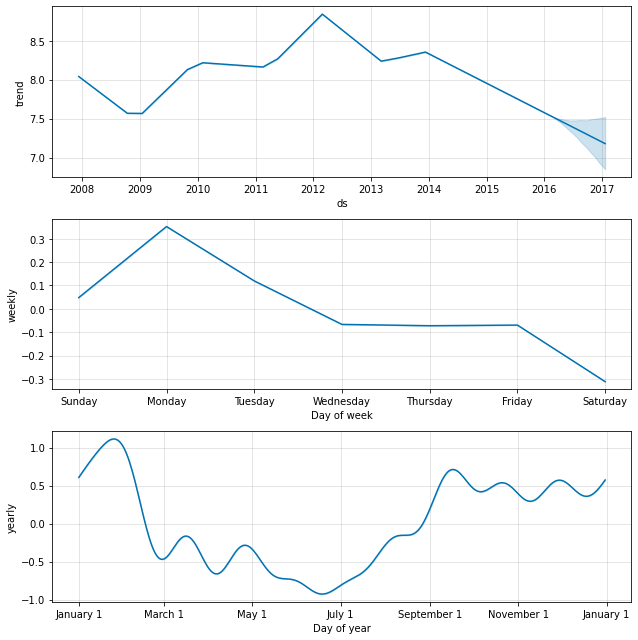

In [ ]:
clf.plot_components(predictions)

In [157]:
from fbprophet.diagnostics import cross_validation ,performance_metrics

In [155]:
cv=cross_validation(clf,initial='35 days',horizon='365 days',period='150 days')

INFO:fbprophet:Making 18 forecasts with cutoffs between 2008-01-27 00:00:00 and 2015-01-20 00:00:00


In [156]:
cv.head

<bound method NDFrame.head of              ds      yhat  yhat_lower  yhat_upper          y     cutoff
0    2008-01-28  8.633156    8.279532    9.003121   8.736489 2008-01-27
1    2008-01-29  7.028431    6.602897    7.402326   8.634087 2008-01-27
2    2008-01-30  5.936664    5.552122    6.336709   8.673513 2008-01-27
3    2008-02-01  3.371914    2.981660    3.760701   8.824237 2008-01-27
4    2008-02-02  1.700083    1.320837    2.094644   8.537976 2008-01-27
...         ...       ...         ...         ...        ...        ...
6440 2016-01-16  8.582470    7.831054    9.312023   7.817223 2015-01-20
6441 2016-01-17  8.977135    8.230652    9.741888   9.273878 2015-01-20
6442 2016-01-18  9.283276    8.536888   10.008589  10.333775 2015-01-20
6443 2016-01-19  9.066440    8.350566    9.789956   9.125871 2015-01-20
6444 2016-01-20  8.902635    8.179871    9.625791   8.891374 2015-01-20

[6445 rows x 6 columns]>

In [159]:
pm=performance_metrics(cv)
print(pm)

     horizon         mse       rmse       mae      mape     mdape  coverage
0    38 days  209.024821  14.457691  3.260202  0.411186  0.052411  0.603520
1    39 days  222.768456  14.925430  3.407780  0.430105  0.052752  0.599896
2    40 days  235.098087  15.332909  3.545179  0.447927  0.052874  0.597481
3    41 days  245.841970  15.679349  3.675410  0.465667  0.052874  0.596091
4    42 days  254.867857  15.964581  3.793571  0.480830  0.052752  0.597050
..       ...         ...        ...       ...       ...       ...       ...
323 361 days   45.646563   6.756224  2.725083  0.336768  0.100095  0.437543
324 362 days   45.532653   6.747789  2.731852  0.337565  0.103120  0.435422
325 363 days   45.333588   6.733022  2.738038  0.339176  0.108258  0.430124
326 364 days   45.161980   6.720266  2.748167  0.340561  0.109966  0.426329
327 365 days   45.121047   6.717220  2.746328  0.340725  0.109456  0.425466

[328 rows x 7 columns]


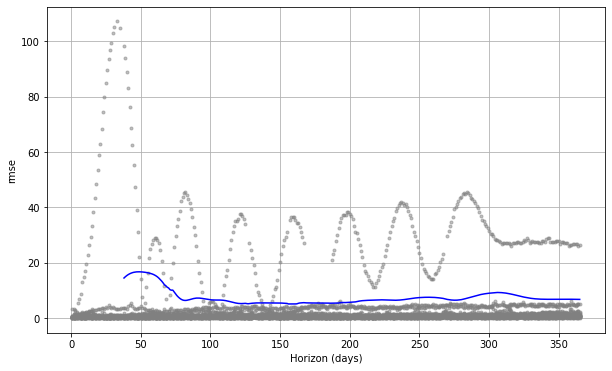

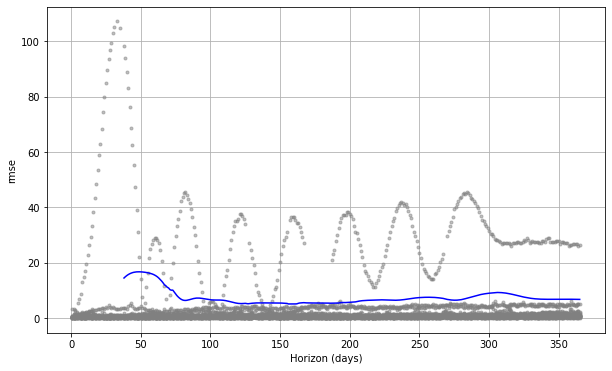

In [163]:
from fbprophet.plot import plot_cross_validation_metric as pcvm
pcvm(cv,metric='rmse')